## Install dependencies

In [1]:
pip install matplotlib seaborn yfinance pandas_datareader xlrd datetime

Note: you may need to restart the kernel to use updated packages.


# Question #1

### Report Class

In [2]:
import yfinance as yfin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import time
import seaborn as sns
from pandas_datareader import data as pdr



#Calculate true range value
def true_range(high, low, previous_close=0):
    return max(abs(high - low),
               abs(high - previous_close),
               abs(low - previous_close))
   


In [34]:
class Reports:

    def __init__(self):
        self.data = None
        self.atr = None
        self.tr = None
        self.retrieve_data()

    # Retrieve data from yahoo finances
    def retrieve_data(self):
        self.data = pdr.get_data_yahoo('SPY')
        return self.data.tail()

    # Calculate simple average in days
    def simple_average(self, days):
        data = self.data.tail(days)
        return str(sum(data["Close"]) / days)
   
    
    #set the true range column
    def set_true_range(self):
        info = self.data
        tr = []
        for i in range(len(self.data)):
            high = self.data.loc[:, "High"][-1+i]
            low = self.data.loc[:, "Low"][-1+i]
            previous = self.data.loc[:, "Close"][-2+i]
            tr.append(true_range(high,low,previous))
        
        info["TR"] = tr
        self.data = info
        
    
    #Set the average tr of the last 5 days column
    def set_avg_5th_range(self):
        info = self.data
        result = []
        for i in range(len(info)):
            if i < 5:
                result.append(0)
            else:
                sum = 0
                for j in range(i,i-5,-1):
                    #print(info["TR"][j],"index:",i)
                    sum += info["TR"][j]
                result.append(sum/5)
                
        
        info["AVG5"] = result
        self.data = info
                    

    # Average true range in days
    def average_true_range(self, num):
        last_num_days = self.data.tail(num + 1)
        # Exlude the last day
        last_num_days = last_num_days.iloc[:-1, :]
        avg = []
        for i in range(last_num_days.shape[0]):
            high = last_num_days.loc[:, "High"][i]
            low = last_num_days.loc[:, "Low"][i]
            previus_one = 0 if i <= 0 else i - 1
            previous_close = last_num_days.loc[:, "Close"][previus_one]
            result = true_range(high, low, previous_close)
            avg.append(result)
            

        return np.mean(avg)
    
    
    #Set)dreturn column
    def set_dreturn(self):
        data = self.data
        result = []
        for i in range(len(data)):
            ans = 0
            if i > 0:
                current = data.loc[:, "Close"][i]
                previous = data.loc[:, "Close"][i-1]
                ans = current - previous
            result.append(ans)
        data["dreturn"] = result
        self.data = data
        
        
    #set sma5
    def set_sma_5(self):
        info = self.data
        result = []
        for i in range(len(info)):
            if i < 5:
                result.append(0)
            else:
                sum = 0
                for j in range(i,i-5,-1):
                    #print(info["TR"][j],"index:",i)
                    sum += info["dreturn"][j]
                result.append(sum/5)
                
        
        info["SMA5"] = result
        self.data = info
        
    # Set dereturn > sma5
    def set_dreturn_sma5(self):
        info = self.data
        result = []
        for i in range(len(info)):
            answer = ""
            if i > 4:
                current_dreturn = info["dreturn"][i]
                current_sma = info["SMA5"][i]
                if current_dreturn > current_sma:
                    answer = "GREATER"
                    
            result.append(answer)
        info["dreturn>SMA"] = result
        self.data = info
    
    
    def set_TR_ATR(self):
        info = self.data
        result = []
        for i in range(len(info)):
            answer = ""
            current_tr = info["TR"][i]
            current_avg = info["AVG5"][i]
            if(current_tr  > current_avg):
                answer = 1
            result.append(answer)
                
        info["TR>AVG5"] = result
        self.data = info
            
                
    def set_output_question(self):
        info = self.data
        result = []
        for i in range(len(info)):
            answer = ""
            current_tr_atr = info["TR>AVG5"][i]
            current_dreturn = info["dreturn"][i]
            current_sma = info["SMA5"][i]
            
            if current_tr_atr is 1:
                if current_dreturn > current_sma:
                    answer = "Greater"
                else:
                    answer = "Less"
                    
            result.append(answer)
        
        info["OUTPUT"] = result
        self.data = info
            
        
            

    # Daily % return
    def daily_return(self, days):
        data = self.data.tail(days)
        dif = data.loc[:, "Close"][-1] - data.loc[:, "Close"][0]
        return dif / 100 * data.loc[:, "Close"][0]

   

    ###Take the values that are higher that the  mean multiplied by some scale, if you increase the num parameter then more data is going to be filter out
    ### Num is the scale that we are going to use to multiply the mean 
    ### Kind  "tr" if we are going to compare using the TR or AVG5 for the average true range in the last 5 days.
    def optimize(self,num,kind=0):
        #init dictcionary
        result = {}
        #general data
        info = self.data
        mean = 0
        #Calculate the mean of tr or  AVG5 colum
        if kind.lower is "tr":
            mean = info["TR"].mean()
        else:
            mean = info["AVG5"].mean()
        rank =  mean * num
        
        #iterate over general data
        for i in range(len(self.data)):
            if kind.lower is "tr":
                value = info["TR"][i]
            else:
                value = info["AVG5"][i]
    
            if value > rank:
                #Connvert timestamp into a custom string format
                date = info.index[i].strftime("%m/%d/%y")
                #store the date that satisfies the condition in a dicitonary
                result[date] = value
                
                
                
            
                
                
                
        return result
                
                
            


### Main

In [35]:
report = Reports()
report.set_dreturn()
report.set_sma_5()

report.set_true_range()
report.data["TR"][1]=report.data.loc[:,["TR"]].median()
report.set_avg_5th_range()
report.set_dreturn_sma5()
report.set_TR_ATR()
report.set_output_question()



    







In [36]:
report.data

,High,Low,Open,Close,Volume,Adj Close,dreturn,SMA5,TR,AVG5,dreturn>SMA,TR>AVG5,OUTPUT
Date,,,,,,,,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,94.130867,0.000000,0.000000,3.170013,0.000000,,1,Less
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,94.380074,0.299995,0.000000,1.679993,0.000000,,1,Greater
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,94.446495,0.080002,0.000000,0.830002,0.000000,,1,Greater
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,94.845207,0.480003,0.000000,0.559998,0.000000,,1,Greater
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,95.160805,0.379997,0.000000,1.150002,0.000000,,1,Greater
2010-01-11,115.129997,114.239998,115.080002,114.730003,106375700.0,95.293701,0.160004,0.280000,0.959999,1.035999,,,
2010-01-12,114.209999,113.220001,113.970001,113.660004,163333500.0,94.404961,-1.070000,0.006001,0.889999,0.878000,,1,Less
2010-01-13,114.940002,113.370003,113.949997,114.620003,161822000.0,95.202347,0.959999,0.182001,1.510002,1.014000,GREATER,1,Greater
2010-01-14,115.139999,114.419998,114.489998,114.930000,115718800.0,95.459831,0.309998,0.148000,1.570000,1.216000,GREATER,1,Greater


### Running 

/home/laika/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


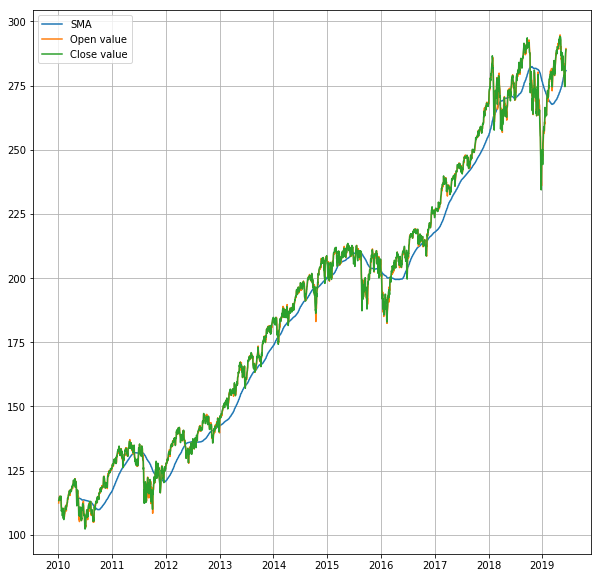

In [6]:
sma_ndays = report.data["Close"].rolling(100).mean()
plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(sma_ndays,label='SMA')
plt.plot(report.data["Open"],label='Open value')
plt.plot(report.data["Close"],label='Close value')


plt.legend(loc=2)

## Optimization

In [7]:
result = report.optimize(3,"AVG5")

In [8]:
result

{'08/11/11': 6.464002990722657,
 '08/12/11': 6.568002319335937,
 '08/26/15': 7.45999755859375,
 '08/27/15': 8.439999389648438,
 '08/28/15': 8.510000610351563,
 '08/31/15': 7.596002197265625,
 '02/07/18': 6.941998291015625,
 '02/08/18': 7.3739990234375,
 '02/09/18': 9.01400146484375,
 '02/12/18': 9.918002319335937,
 '02/13/18': 8.512002563476562,
 '02/14/18': 6.974002075195313,
 '02/15/18': 7.1580047607421875,
 '03/28/18': 6.434002685546875,
 '03/29/18': 6.630010986328125,
 '04/02/18': 6.30201416015625,
 '04/03/18': 6.656008911132813,
 '04/09/18': 6.286001586914063,
 '10/17/18': 6.4280029296875,
 '10/29/18': 6.7219970703125,
 '10/30/18': 8.21199951171875,
 '10/31/18': 7.93199462890625,
 '11/01/18': 7.21199951171875,
 '11/02/18': 6.584002685546875,
 '12/10/18': 6.675994873046875,
 '12/11/18': 7.417999267578125,
 '12/12/18': 7.54599609375,
 '12/13/18': 6.639996337890625,
 '12/21/18': 6.865997314453125,
 '12/24/18': 7.708001708984375,
 '12/26/18': 7.598001098632812,
 '12/27/18': 9.14799804

In [9]:
result = report.optimize(3,"tr")

In [10]:
## This function only print a barchart with the optimizing line, so we are separatin outliers in differents sets of data

def print_optimization():
    plt.figure(figsize=(12,10))
    date = list(result.keys())
    #date = list(map(float,date))
    value = list(result.values())
    value = list(map(float,value))
    optimus_value = np.mean(value)
    optimization_line = np.full((len(date)), optimus_value)
    
    sns.barplot(x=date,y=value)
    sns.regplot(x=value,y=optimization_line,label="Optimization line",scatter=False,color="Black")
    
    #sns.regplot(x=date,y=value,label="Best fit line",scatter=False)
    plt.xticks(rotation=45)
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.legend(loc=2)
    print("The optimization point of these value is {}".format(optimus_value))
    
    
    
    

The optimization point of these value is 7.43516731262207


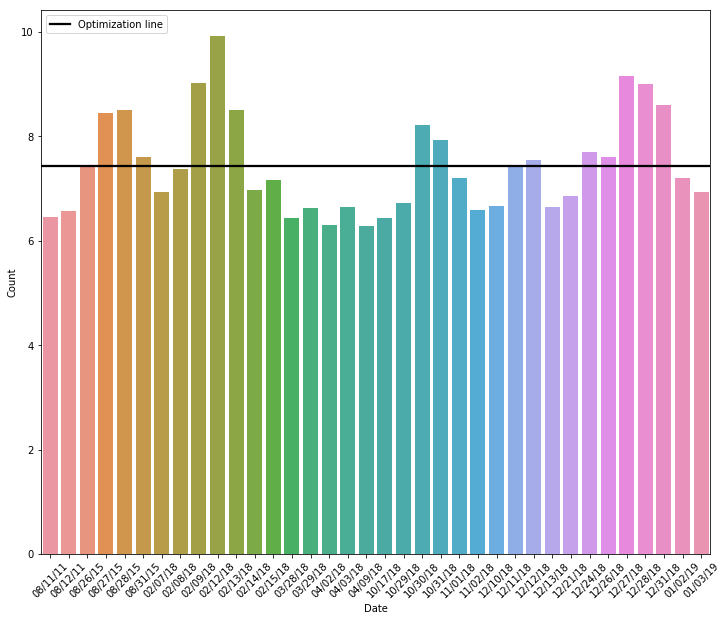

In [11]:
print_optimization()

# QUESTION #2

### Cleanner class

In [12]:
import pandas as pd
import datetime as dt
import numpy as np
from collections import Counter

class Cleanner():

    def __init__(self):
        self.data = None
        self.clean()

    # Delete some NaN dates
    def clean(self):
        data = pd.read_excel("test for trigger dates.xlsx")
        data = data.iloc[:, :3]
        data = data.dropna()
        #sns.countplot(data["date start"])
        self.data = data

    # Sort data by month and create a dictionary to store days
    def sort_data(self):
        data = self.data
        result = {}
        for value in data["date start"]:
            month_str = value.strftime("%B")
            if month_str not in result:
                result[month_str] = []
            else:
                result[month_str].append(value.day)
                result[month_str] = list(result[month_str])

        return result
    
    # Show and count how many times a day repeat trought the time
    def show_data(self):
        result = {}
        data = self.sort_data()
        for value in data.keys():
            result[value] = Counter(data[value])
        
        return result
    
    
        

            
    
    
 
        
    


In [13]:
cln = Cleanner()

In [14]:
data = cln.show_data()

In [15]:
### Sort dictionary by higher frequency
def sort_dict(mydict):
    result = {}
    for key, value in sorted(mydict.items(), key=lambda item: item[1],reverse=True):
        result[key] = value
    
    return result

### Takes n days with the highest frequency in history, for example 4, Take the 4 most repeated days in history per month
def optimize(num):
    info = cln.show_data()
    result = {}
    
    for row in info.items():
        
        elem = sort_dict(row[1])
        days = list(elem.keys())
        values = list(elem.values())
        count = {}
        for i in range(0,num):
          
            count[days[i]] = values[i]
            #print(values[i])
        3
        result[row[0]] = count
        
      
        
    
    return result
        
    
            
            
            


In [16]:
# Take the 3 most repeated days in history per month in a dictionary
# Ex: January : 20: repeat 5 times, 28 repeat 4 times, 12 repeat 3 times
optimize(3)

{'January': {20: 5, 28: 4, 12: 3},
 'February': {8: 5, 2: 4, 11: 4},
 'March': {17: 5, 7: 4, 20: 4},
 'May': {1: 6, 19: 4, 17: 3},
 'July': {19: 4, 15: 4, 10: 3},
 'August': {19: 6, 24: 4, 30: 4},
 'September': {16: 7, 3: 3, 22: 3},
 'October': {3: 5, 11: 3, 8: 3},
 'November': {17: 5, 2: 5, 14: 4},
 'April': {2: 5, 13: 4, 29: 4},
 'June': {13: 5, 24: 4, 29: 4},
 'December': {28: 4, 10: 4, 27: 3}}

## VISUALIZE 

In [17]:
### Count the number of times a date is repeated in the history but not sorted by month
### Num: num values that most repeated
def count_days_by_history(num):
    #init dictionary
    result = {}
    #Dictionary with the n most repeated dates 
    info = optimize(num)
    for val in info:
        for elem in info[val]:
            #Add how many times the day has repetead
            if elem in result:
                result[elem]+=  info[val][elem]
                #if the day is not in the dicitionary add a new entry with the date
            else:
                result[elem] = info[val][elem]
    #Return a sorted dictionary with day as key and number of times repeated as value
    return sort_dict(result)

Text(0, 0.5, 'Count')

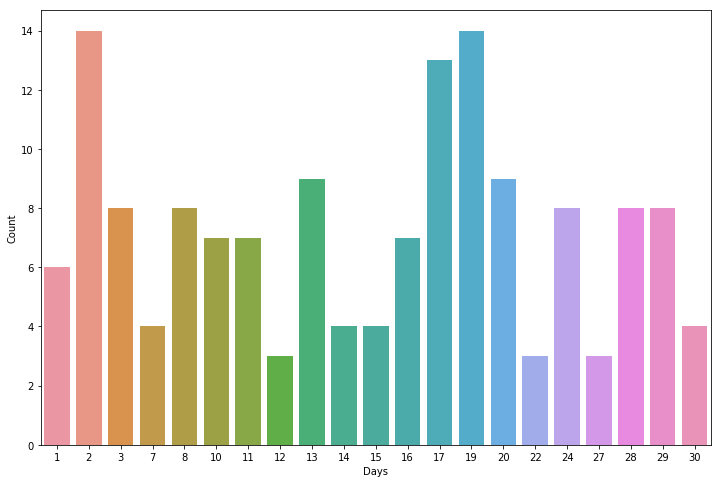

In [18]:
#Count how many times the 3 most common days has been repeated along the history
result = count_days_by_history(3)
#Store the days in a list
days = list(result.keys())
#Store the number of times repeated
count = list(result.values())
plt.figure(figsize=(12,8))
sns.barplot(x=days,y=count)
plt.xlabel("Days")
plt.ylabel("Count")

 
<p> 
'January': {20: 5, 28: 4, 12: 3}, <br>
 'February': {8: 5, 2: 4, 11: 4},<br>
 'March': {17: 5, 7: 4, 20: 4},<br>
 'May': {1: 6, 19: 4, 17: 3},<br>
 'July': {19: 4, 15: 4, 10: 3},<br>
 'August': {19: 6, 24: 4, 30: 4},<br>
 'September': {16: 7, 3: 3, 22: 3},<br>
 'October': {3: 5, 11: 3, 8: 3},<br>
 'November': {17: 5, 2: 5, 14: 4},<br>
 'April': {2: 5, 13: 4, 29: 4},<br>
 'June': {13: 5, 24: 4, 29: 4},<br>
 'December': {28: 4, 10: 4, 27: 3}"<br>
    
 <br>
    <b>Example:</b>
 the day 2 along the history repeat 14 times in february, 5 times in april and 5 times in November <p>

In [19]:
#Dictionary with the most common dates and its frequency along the history
#For example in this case the day two along history repeat 14 times
result

{2: 14,
 19: 14,
 17: 13,
 20: 9,
 13: 9,
 28: 8,
 8: 8,
 24: 8,
 3: 8,
 29: 8,
 11: 7,
 10: 7,
 16: 7,
 1: 6,
 7: 4,
 15: 4,
 30: 4,
 14: 4,
 12: 3,
 22: 3,
 27: 3}